# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
%matplotlib notebook

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(study_results, mouse_metadata, how='left', on=["Mouse ID", "Mouse ID"], left_index=False, right_index=False)

# Display the data table for preview
#mouse_metadata.info(),study_results.info()
mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_count = mouse_study['Mouse ID'].nunique()
mouse_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
mouse_duplicates_ID = mouse_study.loc[mouse_study.duplicated(['Mouse ID','Timepoint']),'Mouse ID'].unique()
mouse_duplicates_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_duplicates = mouse_study.loc[mouse_study['Mouse ID'] == 'g989']
mouse_duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_clean = mouse_study.loc[mouse_study['Mouse ID'] != 'g989']
mouse_study_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = mouse_study_clean['Mouse ID'].value_counts()
clean_mouse_count = len(clean_mouse_count)
clean_mouse_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
tumor_volume_mean = mouse_study_clean.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].mean()
tumor_volume_median = mouse_study_clean.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].median()
tumor_volume_variance = mouse_study_clean.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].var()
tumor_volume_st_dev = mouse_study_clean.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].std()
tumor_volume_SEM = mouse_study_clean.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
regimen_stats = pd.DataFrame({
                               'Mean Tumor Volume': tumor_volume_mean,
                               'Median Tumor Volume': tumor_volume_median,
                               'Tumor Volume Variance': tumor_volume_variance,
                               'Tumor Volume Std. Dev.': tumor_volume_st_dev,
                               'Tumor Volume Std. Err.': tumor_volume_SEM,
                              })
# display single summary DataFrame
regimen_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
agg = mouse_study_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [9]:
# start with one mouse...
#mouse_study_clean_ind = pd.DataFrame(mouse_study_clean.loc[mouse_study_clean['Mouse ID']=='g107',:])
#mouse_study_clean_ind

# set variables for the next two bar charts
bar_xlabels = 'Drug Regimen'
bar_ylabels = 'Number of Timepoints'
bar_title = 'Number of Timepoints per Drug Regimen'

# include all mice
mouse_drug = mouse_study_clean.groupby('Drug Regimen')
mouse_drug_timepoint = mouse_drug[['Timepoint']].count()
mouse_drug_timepoint.head(10)

,Timepoint
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


<IPython.core.display.Javascript object>


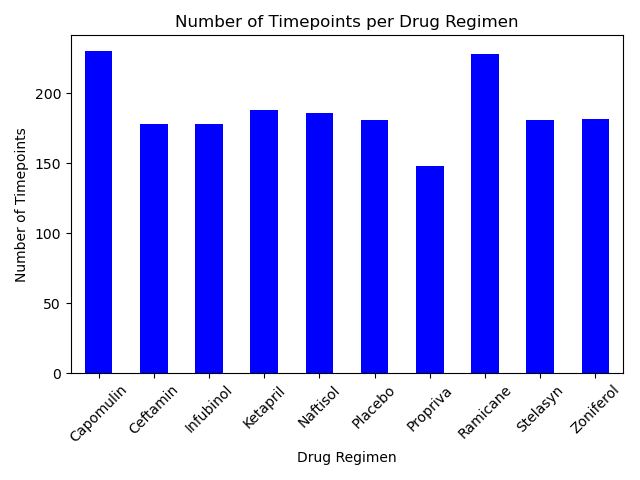

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint_chart_pd = pd.DataFrame(mouse_drug_timepoint)
timepoint_chart_pd.plot(kind='bar', color='blue', legend=None, title=bar_title, )
plt.xlabel(f'{bar_xlabels}')
plt.ylabel(f'{bar_ylabels}')
plt.xticks(rotation=45, horizontalalignment='center')
plt.tight_layout()
plt.savefig("Images/Figure1.png")
plt.show()

<IPython.core.display.Javascript object>


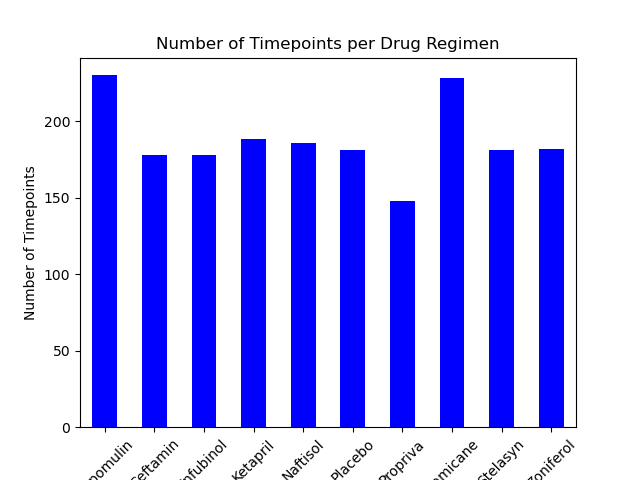

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

timepoint_chart_plt = mouse_drug_timepoint.plot(kind='bar', color='blue', legend=None, title=bar_title, align='center')
timepoint_chart_plt.set_xlabel(bar_xlabels)
timepoint_chart_plt.set_ylabel(bar_ylabels)
timepoint_chart_plt.tick_params(axis='x', rotation=45)
# save image to file
plt.savefig("Images/Figure2.png")
# show image
plt.show()

In [12]:
# pull out gender and the id_s attached (for challenge), need this for challenge results
mouse_sex = mouse_study_clean.groupby('Sex')
mouse_sex_count = mouse_sex['Sex'].count()

# round the count
mouse_sex_percent = (round((mouse_sex_count / mouse_sex_count.sum()) * 100),2)

# display number of mice in this study with percentage calculation rounded
mouse_sex_count,mouse_sex_percent

(Sex
 Female    922
 Male      958
 Name: Sex, dtype: int64,
 (Sex
  Female    49.0
  Male      51.0
  Name: Sex, dtype: float64,
  2))

In [13]:
# STATISTICALLY this is more accurate when taking into account the number of mice involved, not the number of timepoints they are tested
# pull out sex and the UNIQUE Mouse id_s (which were treated) attached
mouse_sex_2 = mouse_study_clean.groupby(['Sex'])['Mouse ID'].nunique()

# rounding automatically defined
mouse_sex_stats = (mouse_sex_2 / mouse_sex_2.sum() * 100)

# redefining number,  round percentages
mouse_sex_stats_2 = (round(mouse_sex_stats),2)

# display number of mice in this study with percentage calculation and rounding the percentage
print(mouse_sex_2, mouse_sex_stats, mouse_sex_stats_2)

Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64 Sex
Female    49.596774
Male      50.403226
Name: Mouse ID, dtype: float64 (Sex
Female    50.0
Male      50.0
Name: Mouse ID, dtype: float64, 2)


<IPython.core.display.Javascript object>


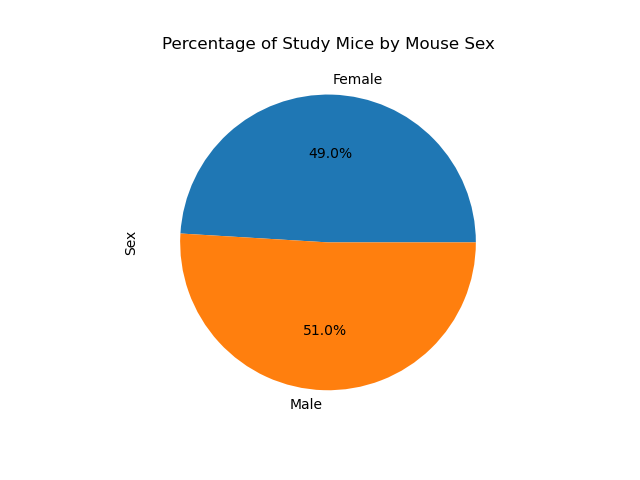

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex_chart_pd = pd.DataFrame(mouse_sex_count)
mouse_sex_chart_pd.plot.pie(y='Sex', autopct="%1.1f%%", legend=None, title='Percentage of Study Mice by Mouse Sex')

# save image to file
plt.savefig("Images/Figure3.png")

# show image
plt.show()

<IPython.core.display.Javascript object>


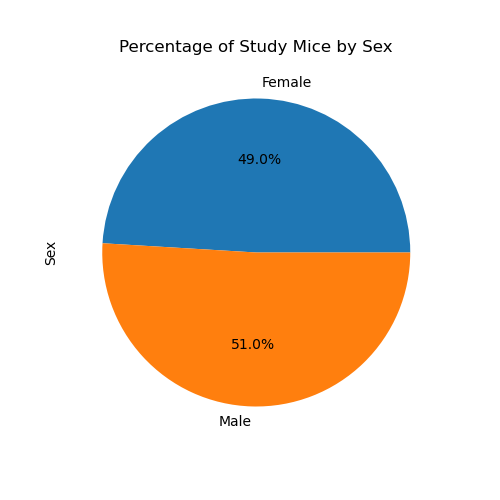

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# set x_axis
sex_idx = mouse_sex_count.index

# create pie chart
fig = plt.figure(figsize =(5, 5))
mouse_sex_percent_plt = plt.pie(mouse_sex_count, labels=sex_idx, autopct="%1.1f%%")

# set y label, title'
plt.title('Percentage of Study Mice by Sex')
plt.ylabel('Sex')

# save image to file
plt.savefig("Images/Figure4.png")

# present the pie chart
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_data = mouse_study_clean.loc[mouse_study_clean['Drug Regimen'] == 'Capomulin']
Ramicane_data = mouse_study_clean.loc[mouse_study_clean['Drug Regimen'] == 'Ramicane']
Infubinol_data = mouse_study_clean.loc[mouse_study_clean['Drug Regimen'] == 'Infubinol']
Ceftamin_data = mouse_study_clean.loc[mouse_study_clean['Drug Regimen'] == 'Ceftamin']

# Simply select the rows that were drug regimens used in the four treatment regimens being analyzed
regimens_four = pd.concat([Capomulin_data, Ramicane_data, Infubinol_data, Ceftamin_data], axis=0)

# Start by getting the last (greatest) timepoint for each mouse
timepoint_last = mouse_study_clean.groupby(['Drug Regimen','Mouse ID']).last()[['Timepoint']]
                                                 
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_volume_df = pd.merge(timepoint_last, regimens_four, left_on=['Mouse ID','Timepoint'], right_on = ['Mouse ID','Timepoint'])

# Display data for "on the right track information"
regimens_four, timepoint_last, final_volume_df

(     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
 0        b128          0           45.000000                 0    Capomulin   
 226      j246          0           45.000000                 0    Capomulin   
 227      r554          0           45.000000                 0    Capomulin   
 228      s185          0           45.000000                 0    Capomulin   
 229      b742          0           45.000000                 0    Capomulin   
 ...       ...        ...                 ...               ...          ...   
 1858     k210         45           68.923185                 3     Ceftamin   
 1862     x822         45           61.386660                 3     Ceftamin   
 1864     l733         45           64.299830                 1     Ceftamin   
 1872     o287         45           59.741901                 4     Ceftamin   
 1890     p438         45           61.433892                 1     Ceftamin   
 
          Sex  Age_months  Weight (g) 

In [59]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_volume_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.     
for treatment in treatments:   
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_volume = final_volume_df.loc[final_volume_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
   
    # add subset 
    final_tumor_volume.append(final_tumor_volume_list)

    # Calculations
    vol_mean =  final_tumor_volume.mean()
        
    quartiles = final_tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Determine outliers using upper and lower bounds
    outliers = final_tumor_volume.loc[(final_tumor_volume < lower_bound)
                                            | (final_tumor_volume > upper_bound)]
    # Print the findings
    print(f'{treatment} tumor volume average is {round(vol_mean,3)}, median is {round(quartiles[0.5],3)}. The quartiles are: lower {round(lowerq,3)} and upper {round(upperq,3)} ')
    print(f'  {treatment} outliers could be above {round(upper_bound,3)} and below {round(lower_bound,3)}. The interquartile range is {round(iqr,3)}.')
    print('-' * 30)

Capomulin tumor volume average is 36.668, median is 38.125. The quartiles are: lower 32.377 and upper 40.159 
  Capomulin outliers could be above 51.832 and below 20.705. The interquartile range is 7.782.
------------------------------
Ramicane tumor volume average is 36.191, median is 36.562. The quartiles are: lower 31.56 and upper 40.659 
  Ramicane outliers could be above 54.307 and below 17.913. The interquartile range is 9.099.
------------------------------
Infubinol tumor volume average is 58.178, median is 60.165. The quartiles are: lower 54.049 and upper 65.526 
  Infubinol outliers could be above 82.741 and below 36.833. The interquartile range is 11.477.
------------------------------
Ceftamin tumor volume average is 57.754, median is 59.852. The quartiles are: lower 48.722 and upper 64.3 
  Ceftamin outliers could be above 87.666 and below 25.355. The interquartile range is 15.578.
------------------------------


In [18]:
# simple test for code purposes
# Capomulin_last_volume = final_volume_df.loc[final_volume_df['Drug Regimen'] == 'Capomulin']
# Capomulin_last_volume.head(5)

In [19]:
## this will create a dataframe for each drug treatment
Capomulin_last_volume = final_volume_df.loc[final_volume_df['Drug Regimen'] == 'Capomulin']
Ramicane_last_volume = final_volume_df.loc[final_volume_df['Drug Regimen'] == 'Ramicane']
Infubinol_last_volume = final_volume_df.loc[final_volume_df['Drug Regimen'] == 'Infubinol']
Ceftamin_last_volume = final_volume_df.loc[final_volume_df['Drug Regimen'] == 'Ceftamin']

## this will create a big dataframe composed of all the dfs
regimens_subset = pd.concat([Capomulin_last_volume, Ramicane_last_volume, Infubinol_last_volume, Ceftamin_last_volume])
# create dictionary to loop through
regimens_columns = {
        regimens_subset['Drug Regimen']:regimens_subset['Timepoint']['Tumor Volume (mm3)']
    
    
}

# define boxplot variables
#x_value = regimens_subset['Timepoint']
#y_value = regimens_subset['Tumor Volume (mm3)']

# create dictionary to loop through

    

    
    
# this creates one boxplot for the first dataframe, loop through this
# fig, axs = plt.subplots(1, len(regimens_subset.columns), figsize=(20,10))
# for drug, ax in enumerate(axs.flat):
#     ax.boxplot(regimens_subset.iloc[:,i])
#     regimens_subset.iloc[:,i]
#     ax.set_title(regimens_subset.columns[i],fontsize=20, fontweight='bold')
#     ax.tick_params(axis='y', labelsize=14)
    

#for drug in regimens_subset(['Drug Regimen']):
#    regimens_subset.boxplot(by = 'Drug Regimen', column =['Tumor Volume (mm3)'], grid = False)

#plt.tight_layout()
regimens_subset

KeyError: 'Tumor Volume (mm3)'

In [20]:
regimens_subset = pd.concat([Capomulin_last_volume, Ramicane_last_volume, Infubinol_last_volume, Ceftamin_last_volume])
# create dictionary to loop through
regimens_columns = {
        regimens_subset['Drug Regimen']:regimens_subset['Timepoint']['Tumor Volume (mm3)']
}
type(regimens_columns)

KeyError: 'Tumor Volume (mm3)'

In [21]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
regimens_subset.boxplot

<bound method boxplot_frame of    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0      b128         45           38.982878                 2    Capomulin   
1      b742         45           38.939633                 0    Capomulin   
2      f966         20           30.485985                 0    Capomulin   
3      g288         45           37.074024                 1    Capomulin   
4      g316         45           40.159220                 2    Capomulin   
..      ...        ...                 ...               ...          ...   
45     x226          0           45.000000                 0     Ceftamin   
46     x581         45           64.634949                 3     Ceftamin   
47     x822         45           61.386660                 3     Ceftamin   
48     y769         45           68.594745                 4     Ceftamin   
49     y865         45           64.729837                 3     Ceftamin   

       Sex  Age_months  Weight (g)  
0   Fem

## Line and Scatter Plots

<IPython.core.display.Javascript object>


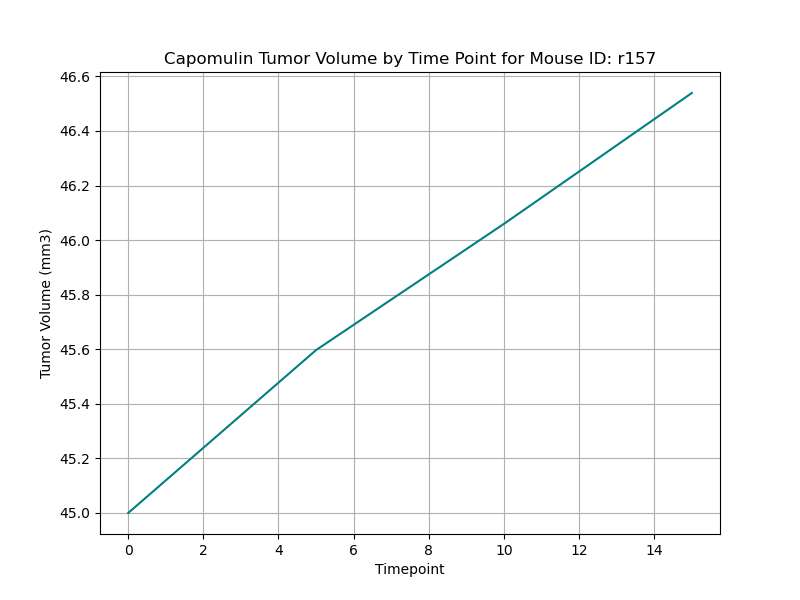

In [44]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_1mouse_df = Capomulin_data.loc[Capomulin_data['Mouse ID'] == 'r157',:]

# plot details, add chart features
fig5 = Capomulin_1mouse_df.plot(
                            kind='line',
                            x='Timepoint', y='Tumor Volume (mm3)',
                            legend=None, figsize=(8,6),
                            linewidth=1.50,
                            color='Teal'
)
# set titles and labels
fig5.set_title('Capomulin Tumor Volume by Time Point for Mouse ID: r157')
fig5.set_xlabel('Timepoint')
fig5.set_ylabel('Tumor Volume (mm3)')

# present the data
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


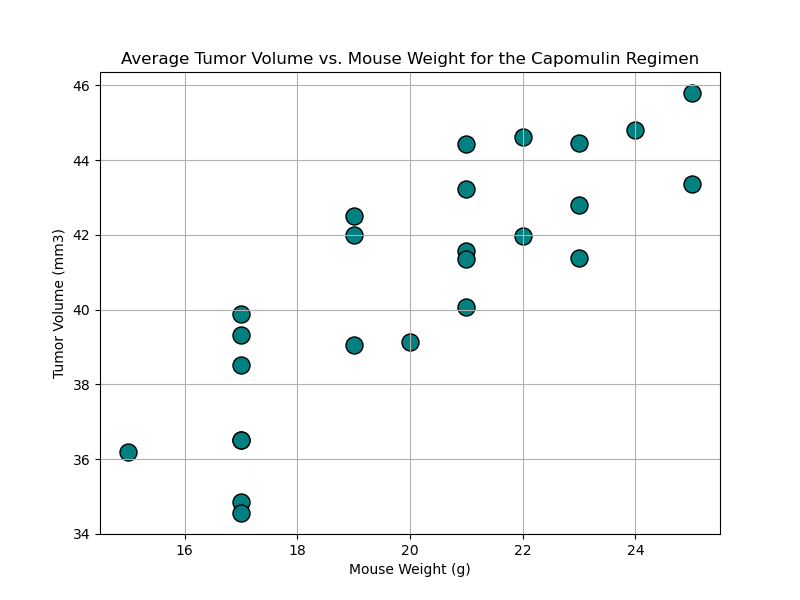

In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen (using pandas)
Capomulin_average_pd = Capomulin_data.groupby(['Mouse ID']).mean() 
# plot details, add chart features
fig6 = Capomulin_average_pd.plot(
                            kind='scatter',
                            x='Weight (g)', y='Tumor Volume (mm3)',
                            legend=False, marker='o',
                            figsize=(8,6), s= 150,
                            edgecolor='Black',
                            c='Teal'
)
# set titles and labels
fig6.set_title('Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen')
fig6.set_xlabel('Mouse Weight (g)')
fig6.set_ylabel('Tumor Volume (mm3)')

# present the data
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


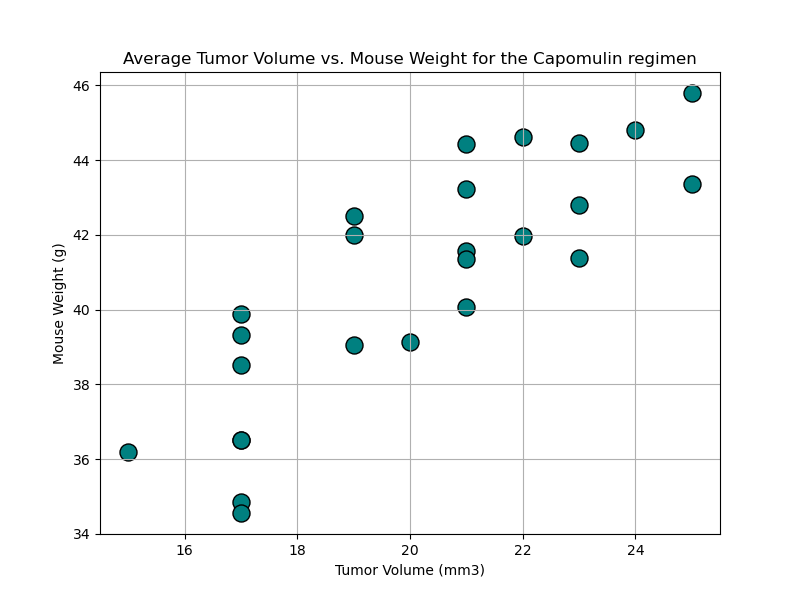

In [24]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen (using pyplot)

# plot details, add chart features
fig7, ax7 = plt.subplots(figsize=(8,6))
Capomulin_average = Capomulin_data.groupby(['Mouse ID']).mean() 

x_values = Capomulin_average['Weight (g)']
y_values = Capomulin_average['Tumor Volume (mm3)']
plt.scatter(x_values, y_values, s=150, marker='o', edgecolors='Black', c='Teal')

# set title, labels, and present the data
plt.title('Average Tumor Volume vs. Mouse Weight for the Capomulin regimen')  
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

# present the data
plt.grid(True)
plt.show()

## Correlation and Regression

<IPython.core.display.Javascript object>


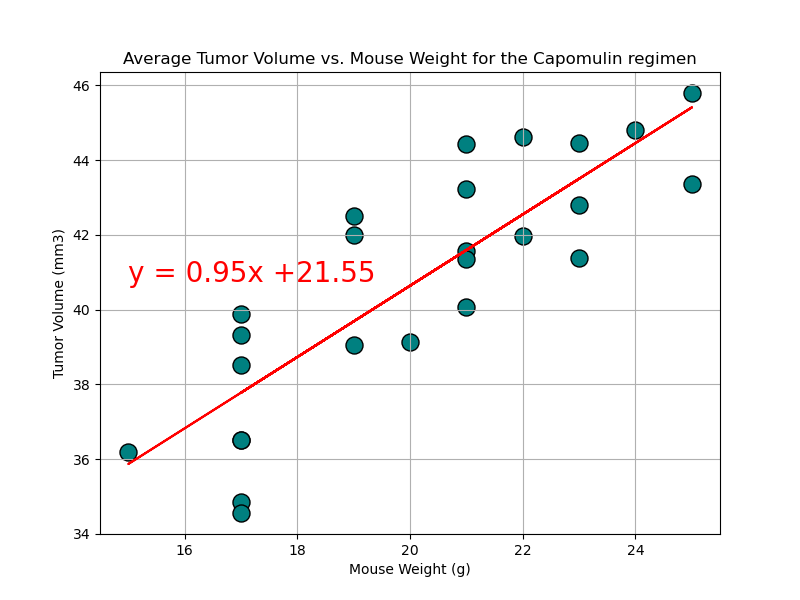

The correlation coefficient between Tumor Volume(mm3) and Weight(g) is 0.84
The r-value is: 0.7088568047708717


In [43]:
# Calculate the correlation coefficient and linear regression model
fig8, ax8 = plt.subplots(figsize=(8,6))
Capomulin_average = Capomulin_data.groupby(['Mouse ID']).mean() 

x_values = Capomulin_average['Weight (g)']
y_values = Capomulin_average['Tumor Volume (mm3)']
print(f"The correlation coefficient between Tumor Volume(mm3) and Weight(g) is {round(st.pearsonr(x_values, y_values)[0],2)}")

# for mouse weight (x-values) and average tumor volume (y_values) for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values =x_values * slope + intercept

slope_intercept = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))  ## y = mx + b

# plot details, add annotation, add chart features
plt.scatter(x_values, y_values, s=150, marker='o', edgecolors='Black', c='Teal')
plt.plot(x_values, regress_values, 'r-') ##'r-' is a red line

plt.annotate(slope_intercept, xy=(22, 40), xytext=(15,40.75), fontsize=20,color="red")

# set title, labels, and present the data
plt.title('Average Tumor Volume vs. Mouse Weight for the Capomulin regimen')            
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

# print r value
print(f'The r-value is: {rvalue**2}')

# present the data
plt.grid(True)
plt.show()